In [1]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import seaborn as sns
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
ruta_archivo = '/content/drive/MyDrive/data_CA/master_v_mplus_short.csv'

In [4]:
dataset = pd.read_csv(ruta_archivo)

In [5]:
dataset.columns

Index(['estacion', 'fecha', 'año', 'dia_año', 'mes', 'dia_mes', 'dia_tipo',
       'prec', 'tmed', 'hrmed', 'velmed', 'dir', 'presmed',
       'dioxido_nitrogeno', 'monoxido_nitrogeno', 'oxido_nitrogeno', 'ozono',
       'pm25', 'pm10', 'intensidad', 'ocupacion', 'carga'],
      dtype='object')

In [10]:
dataset.ozono = pd.to_numeric(dataset.ozono.replace('NoInfo', None))
dataset.pm25 = pd.to_numeric(dataset.pm25.replace('NoInfo', None))
dataset.pm10 = pd.to_numeric(dataset.pm10.replace('NoInfo', None))

data = dataset

# sin datos en estas variables en algunas estaciones, guardadas como object, transformar a float para graficar

In [13]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
estacion,10224,4,BARAJAS,2556,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fecha,10224,2556,2017-01-01,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
año,10224.0,NaN,NaN,NaN,2020.0,1.999707,2017.0,2018.0,2020.0,2022.0,2023.0
dia_año,10224.0,NaN,NaN,NaN,183.071596,105.412714,1.0,92.0,183.0,274.0,366.0
mes,10224.0,NaN,NaN,NaN,6.524257,3.448507,1.0,4.0,7.0,10.0,12.0
dia_mes,10224.0,NaN,NaN,NaN,15.725743,8.798876,1.0,8.0,16.0,23.0,31.0
dia_tipo,10224,2,LAB,6948,NaN,NaN,NaN,NaN,NaN,NaN,NaN
prec,10224.0,NaN,NaN,NaN,1.138487,4.182197,0.0,0.0,0.0,0.0,91.2
tmed,10224.0,NaN,NaN,NaN,16.024554,7.825588,-6.2,9.5,15.1,22.4,34.4
hrmed,10224.0,NaN,NaN,NaN,54.274045,19.188356,15.0,38.0,52.0,68.05,100.0


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10224 entries, 0 to 10223
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   estacion            10224 non-null  object 
 1   fecha               10224 non-null  object 
 2   año                 10224 non-null  int64  
 3   dia_año             10224 non-null  int64  
 4   mes                 10224 non-null  int64  
 5   dia_mes             10224 non-null  int64  
 6   dia_tipo            10224 non-null  object 
 7   prec                10224 non-null  float64
 8   tmed                10224 non-null  float64
 9   hrmed               10224 non-null  float64
 10  velmed              10224 non-null  float64
 11  dir                 10224 non-null  float64
 12  presmed             10224 non-null  float64
 13  dioxido_nitrogeno   10224 non-null  float64
 14  monoxido_nitrogeno  10224 non-null  float64
 15  oxido_nitrogeno     10224 non-null  float64
 16  ozon

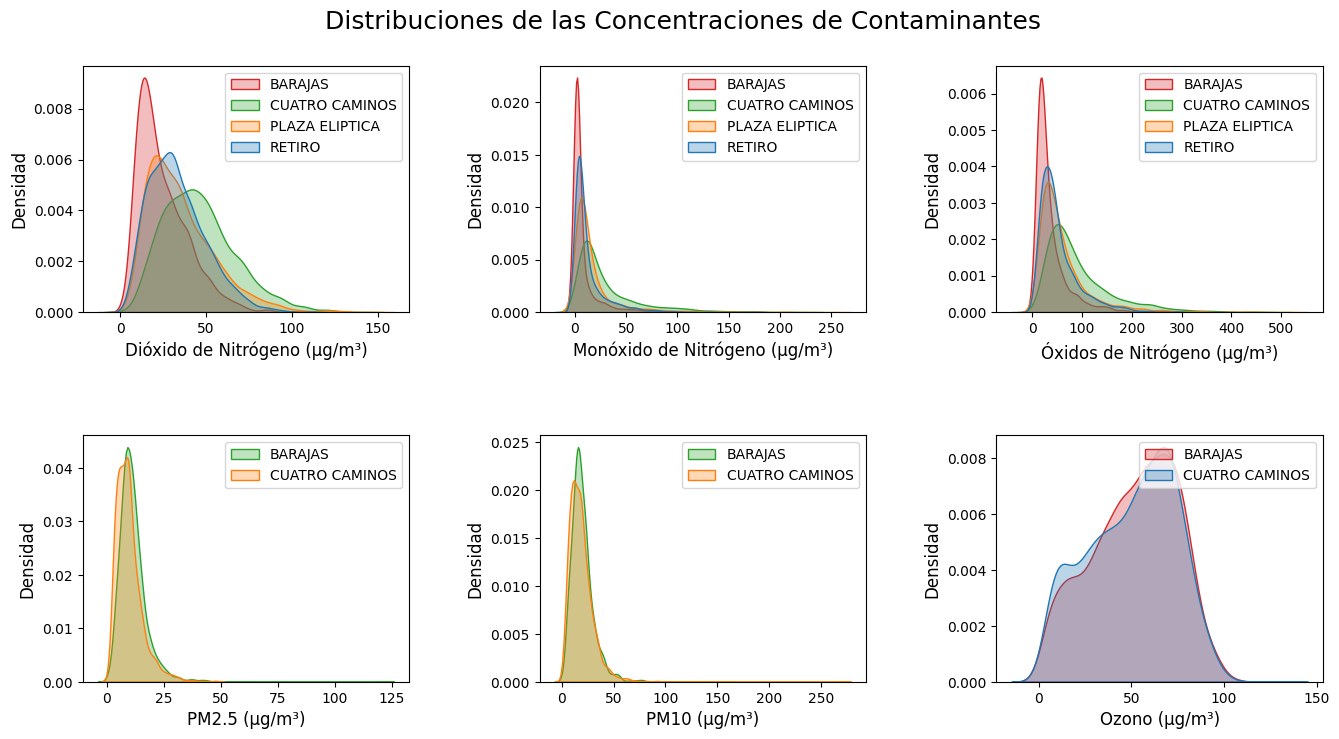

In [122]:
fig = plt.figure(1 , figsize = (16 , 8))
n = 0
columns_c = ['dioxido_nitrogeno', 'monoxido_nitrogeno', 'oxido_nitrogeno', 'pm25', 'pm10', 'ozono']

cmap = plt.cm.get_cmap('tab10',9)

for c in columns_c:
    n += 1
    plt.subplot(2, 3, n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.4)
    sns.kdeplot(data, x=data[c], fill=True, color=cmap(n-1), alpha=0.3, hue='estacion', legend=False)
    plt.legend(data.estacion.unique())
    fig.axes[n-1].set_ylabel('Densidad', fontsize=12)

fig.axes[0].set_xlabel('Dióxido de Nitrógeno (µg/m³)', fontsize=12)
fig.axes[1].set_xlabel('Monóxido de Nitrógeno (µg/m³)', fontsize=12)
fig.axes[2].set_xlabel('Óxidos de Nitrógeno (µg/m³)', fontsize=12)
fig.axes[3].set_xlabel('PM2.5 (µg/m³)', fontsize=12)
fig.axes[4].set_xlabel('PM10 (µg/m³)', fontsize=12)
fig.axes[5].set_xlabel('Ozono (µg/m³)', fontsize=12)

fig.suptitle('Distribuciones de las Concentraciones de Contaminantes', fontsize=18, y=0.95)
plt.show()


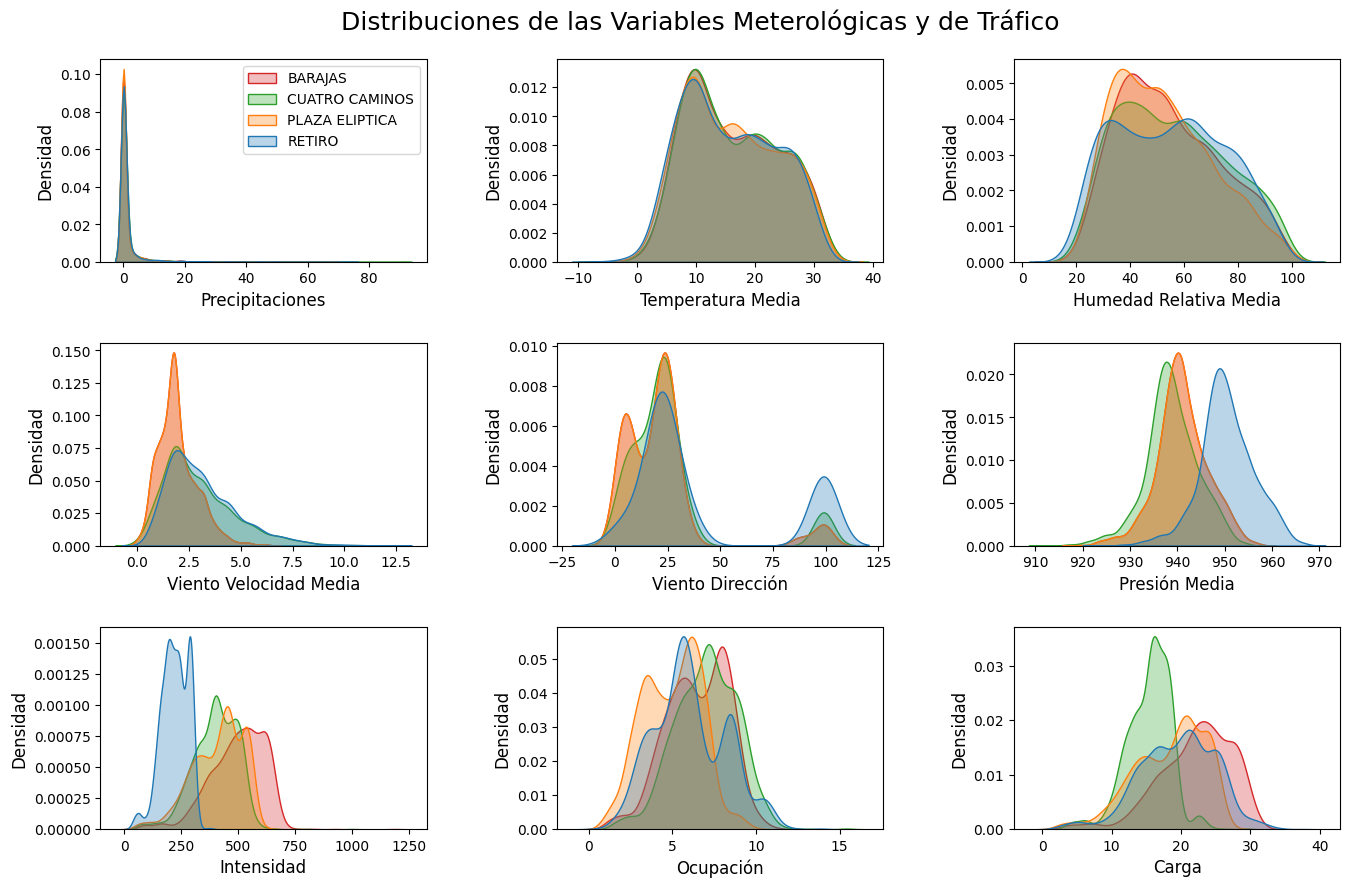

In [123]:
fig = plt.figure(1 , figsize = (16 , 10))
n = 0
columns_c = ['prec', 'tmed', 'hrmed', 'velmed', 'dir', 'presmed', 'intensidad', 'ocupacion', 'carga']

cmap = plt.cm.get_cmap('tab10',9)

for c in columns_c:
    n += 1
    plt.subplot(3, 3, n)
    plt.subplots_adjust(hspace = 0.4 , wspace = 0.4)
    sns.kdeplot(data, x=data[c], fill=True, color=cmap(n-1), alpha=0.3, hue='estacion', legend=False)
    fig.axes[n-1].set_ylabel('Densidad', fontsize=12)

fig.axes[0].set_xlabel('Precipitaciones', fontsize=12)
fig.axes[1].set_xlabel('Temperatura Media', fontsize=12)
fig.axes[2].set_xlabel('Humedad Relativa Media', fontsize=12)
fig.axes[3].set_xlabel('Viento Velocidad Media', fontsize=12)
fig.axes[4].set_xlabel('Viento Dirección', fontsize=12)
fig.axes[5].set_xlabel('Presión Media', fontsize=12)
fig.axes[6].set_xlabel('Intensidad', fontsize=12)
fig.axes[7].set_xlabel('Ocupación', fontsize=12)
fig.axes[8].set_xlabel('Carga', fontsize=12)

fig.suptitle('Distribuciones de las Variables Meterológicas y de Tráfico', fontsize=18, y=0.93)
fig.axes[0].legend(data.estacion.unique())
plt.show()

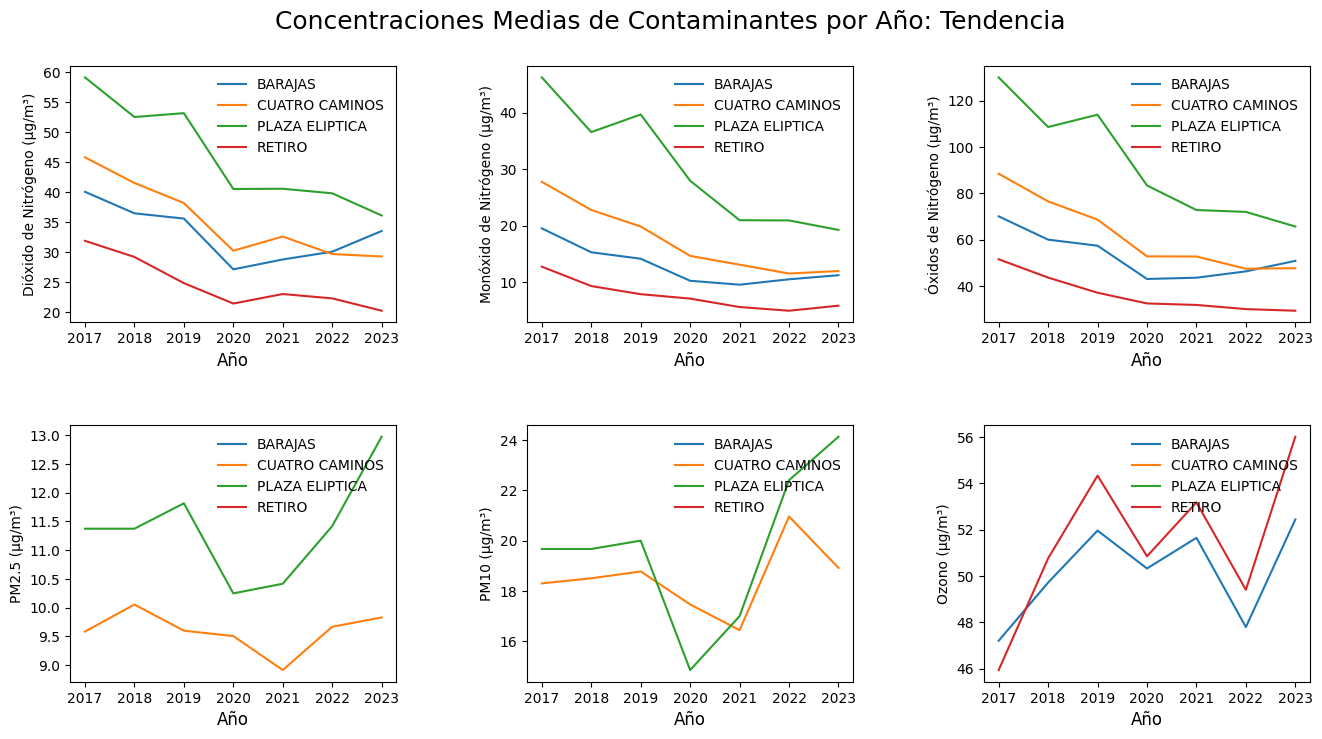

In [95]:
fig = plt.figure(1 , figsize = (16 , 8))
n = 0
columns_c = ['dioxido_nitrogeno', 'monoxido_nitrogeno', 'oxido_nitrogeno', 'pm25', 'pm10', 'ozono']

cmap = plt.cm.get_cmap('tab10',9)

for c in columns_c:
    n += 1
    plt.subplot(2, 3, n)
    plt.subplots_adjust(hspace = 0.4 , wspace = 0.4)
    ax = sns.lineplot(data.groupby(['estacion','año']).mean(numeric_only=True), x='año', y=c, color=cmap(n-1), hue='estacion')
    sns.move_legend(ax, 'upper right', title=None, frameon=False)

fig.axes[0].set_xlabel('Año', fontsize=12)
fig.axes[0].set_ylabel('Dióxido de Nitrógeno (µg/m³)')
fig.axes[1].set_xlabel('Año', fontsize=12)
fig.axes[1].set_ylabel('Monóxido de Nitrógeno (µg/m³)')
fig.axes[2].set_xlabel('Año', fontsize=12)
fig.axes[2].set_ylabel('Óxidos de Nitrógeno (µg/m³)')
fig.axes[3].set_xlabel('Año', fontsize=12)
fig.axes[3].set_ylabel('PM2.5 (µg/m³)')
fig.axes[4].set_xlabel('Año', fontsize=12)
fig.axes[4].set_ylabel('PM10 (µg/m³)')
fig.axes[5].set_xlabel('Año', fontsize=12)
fig.axes[5].set_ylabel('Ozono (µg/m³)')


fig.suptitle('Concentraciones Medias de Contaminantes por Año: Tendencia', fontsize=18, y=0.95)
plt.show()

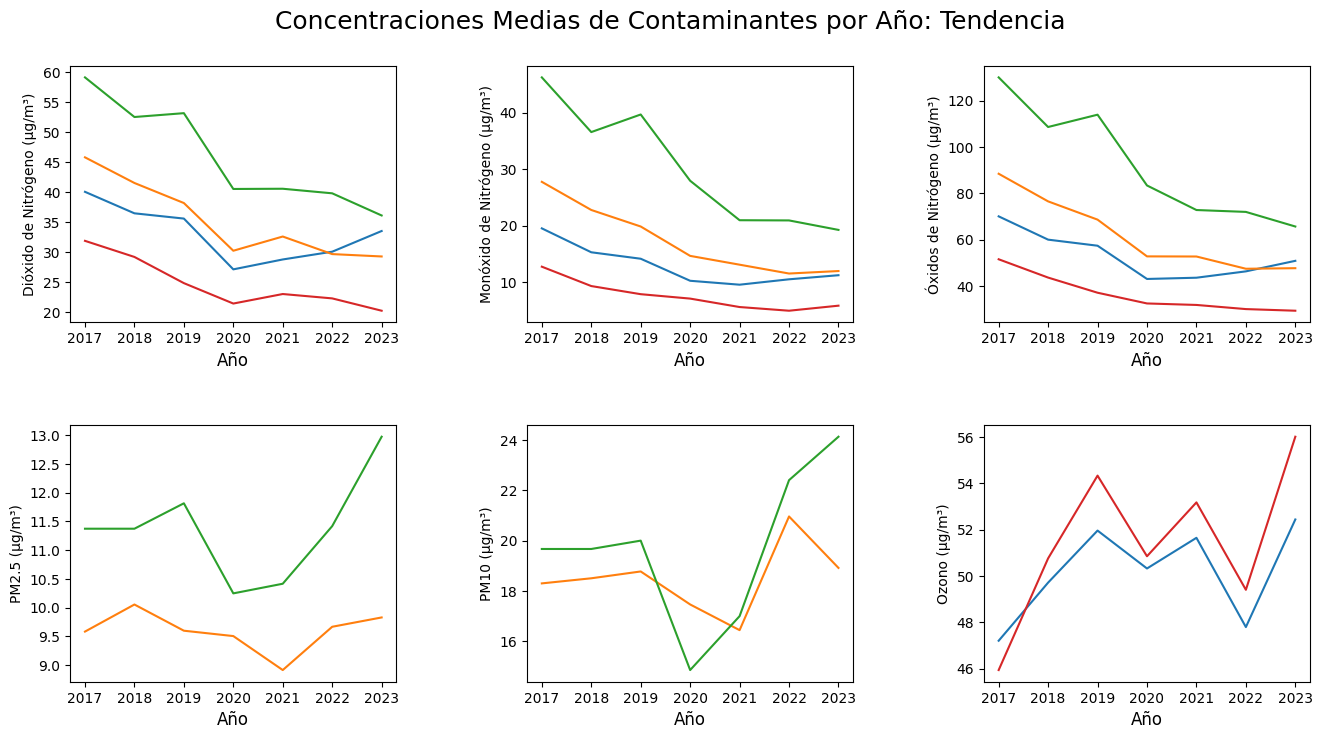

In [96]:
# sin leyenda
fig = plt.figure(1 , figsize = (16 , 8))
n = 0
columns_c = ['dioxido_nitrogeno', 'monoxido_nitrogeno', 'oxido_nitrogeno', 'pm25', 'pm10', 'ozono']

cmap = plt.cm.get_cmap('tab10',9)

for c in columns_c:
    n += 1
    plt.subplot(2, 3, n)
    plt.subplots_adjust(hspace = 0.4 , wspace = 0.4)
    ax = sns.lineplot(data.groupby(['estacion','año']).mean(numeric_only=True), x='año', y=c, color=cmap(n-1), hue='estacion', legend=False)

fig.axes[0].set_xlabel('Año', fontsize=12)
fig.axes[0].set_ylabel('Dióxido de Nitrógeno (µg/m³)')
fig.axes[1].set_xlabel('Año', fontsize=12)
fig.axes[1].set_ylabel('Monóxido de Nitrógeno (µg/m³)')
fig.axes[2].set_xlabel('Año', fontsize=12)
fig.axes[2].set_ylabel('Óxidos de Nitrógeno (µg/m³)')
fig.axes[3].set_xlabel('Año', fontsize=12)
fig.axes[3].set_ylabel('PM2.5 (µg/m³)')
fig.axes[4].set_xlabel('Año', fontsize=12)
fig.axes[4].set_ylabel('PM10 (µg/m³)')
fig.axes[5].set_xlabel('Año', fontsize=12)
fig.axes[5].set_ylabel('Ozono (µg/m³)')


fig.suptitle('Concentraciones Medias de Contaminantes por Año: Tendencia', fontsize=18, y=0.95)
plt.show()

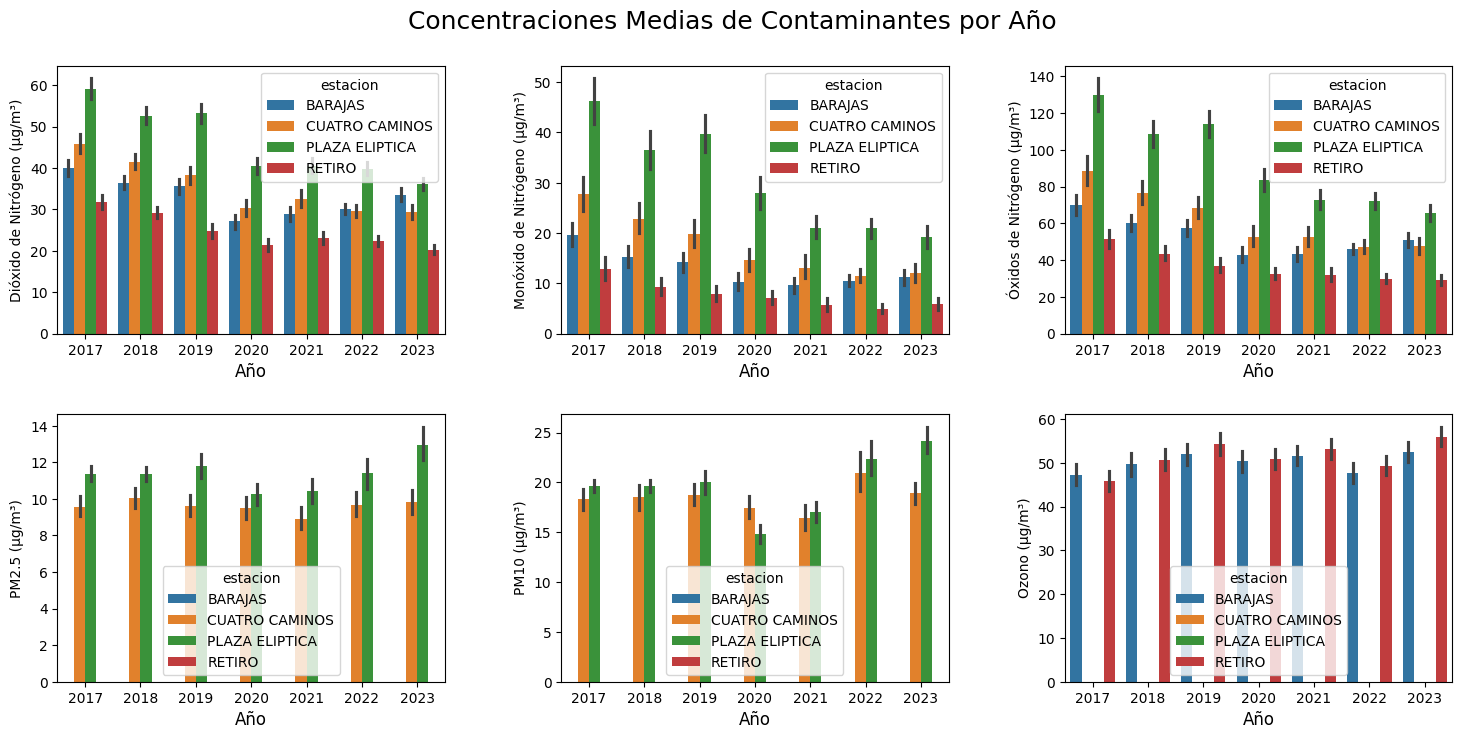

In [124]:
fig = plt.figure(1 , figsize = (18 , 8))
n = 0
columns_c = ['dioxido_nitrogeno', 'monoxido_nitrogeno', 'oxido_nitrogeno', 'pm25', 'pm10', 'ozono']

cmap = plt.cm.get_cmap('tab10',9)

for c in columns_c:
    n += 1
    plt.subplot(2, 3, n)
    plt.subplots_adjust(hspace = 0.3 , wspace = 0.3)
    sns.barplot(data, x='año', y=c, palette='tab10', width=0.8, hue='estacion') # calcula la media

fig.axes[0].set_xlabel('Año', fontsize=12)
fig.axes[0].set_ylabel('Dióxido de Nitrógeno (µg/m³)')
fig.axes[1].set_xlabel('Año', fontsize=12)
fig.axes[1].set_ylabel('Monóxido de Nitrógeno (µg/m³)')
fig.axes[2].set_xlabel('Año', fontsize=12)
fig.axes[2].set_ylabel('Óxidos de Nitrógeno (µg/m³)')
fig.axes[3].set_xlabel('Año', fontsize=12)
fig.axes[3].set_ylabel('PM2.5 (µg/m³)')
fig.axes[4].set_xlabel('Año', fontsize=12)
fig.axes[4].set_ylabel('PM10 (µg/m³)')
fig.axes[5].set_xlabel('Año', fontsize=12)
fig.axes[5].set_ylabel('Ozono (µg/m³)')

fig.suptitle('Concentraciones Medias de Contaminantes por Año', fontsize=18, y=0.95)
plt.show()

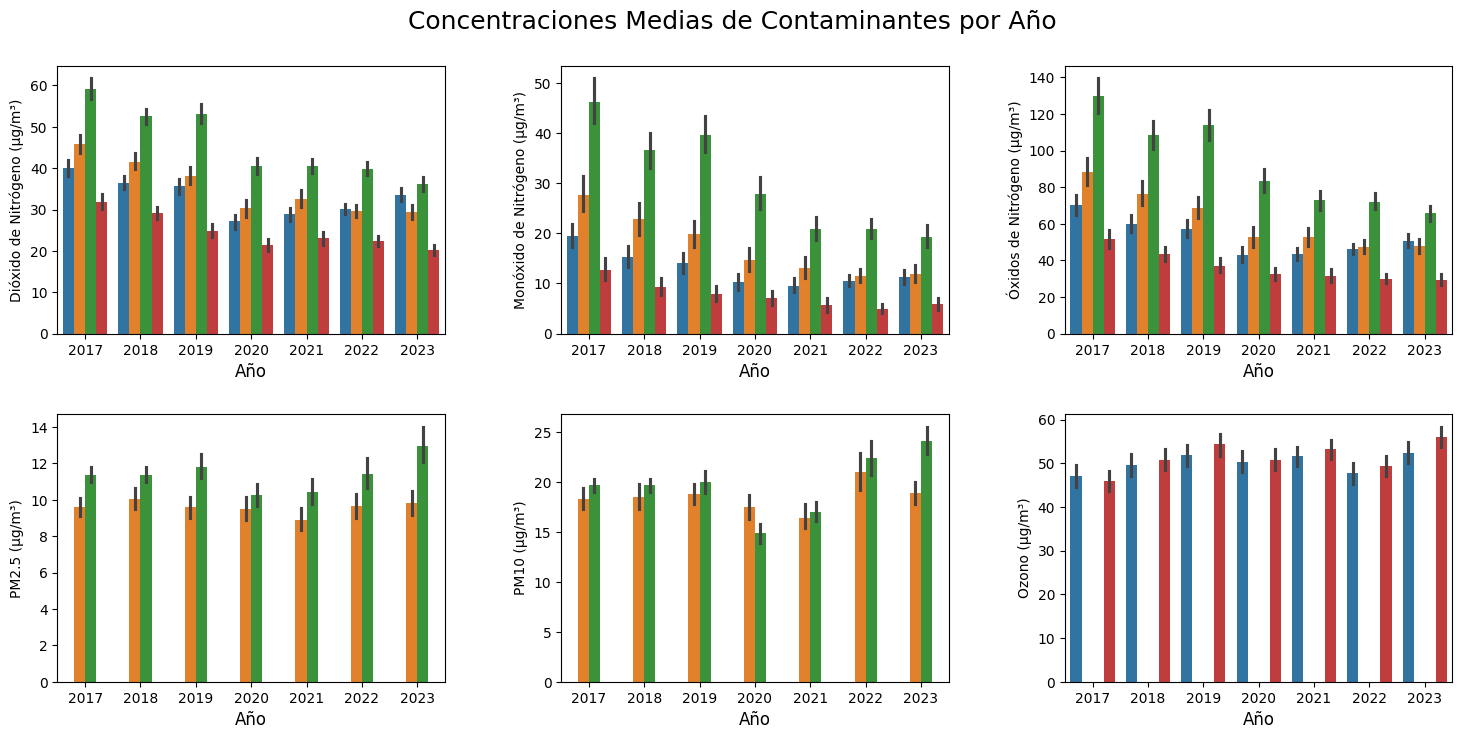

In [125]:
# sin leyenda
fig = plt.figure(1 , figsize = (18 , 8))
n = 0
columns_c = ['dioxido_nitrogeno', 'monoxido_nitrogeno', 'oxido_nitrogeno', 'pm25', 'pm10', 'ozono']

cmap = plt.cm.get_cmap('tab10',9)

for c in columns_c:
    n += 1
    plt.subplot(2, 3, n)
    plt.subplots_adjust(hspace = 0.3 , wspace = 0.3)
    sns.barplot(data, x='año', y=c, palette='tab10', width=0.8, hue='estacion', legend=False) # calcula la media


fig.axes[0].set_xlabel('Año', fontsize=12)
fig.axes[0].set_ylabel('Dióxido de Nitrógeno (µg/m³)')
fig.axes[1].set_xlabel('Año', fontsize=12)
fig.axes[1].set_ylabel('Monóxido de Nitrógeno (µg/m³)')
fig.axes[2].set_xlabel('Año', fontsize=12)
fig.axes[2].set_ylabel('Óxidos de Nitrógeno (µg/m³)')
fig.axes[3].set_xlabel('Año', fontsize=12)
fig.axes[3].set_ylabel('PM2.5 (µg/m³)')
fig.axes[4].set_xlabel('Año', fontsize=12)
fig.axes[4].set_ylabel('PM10 (µg/m³)')
fig.axes[5].set_xlabel('Año', fontsize=12)
fig.axes[5].set_ylabel('Ozono (µg/m³)')

fig.suptitle('Concentraciones Medias de Contaminantes por Año', fontsize=18, y=0.95)
plt.show()

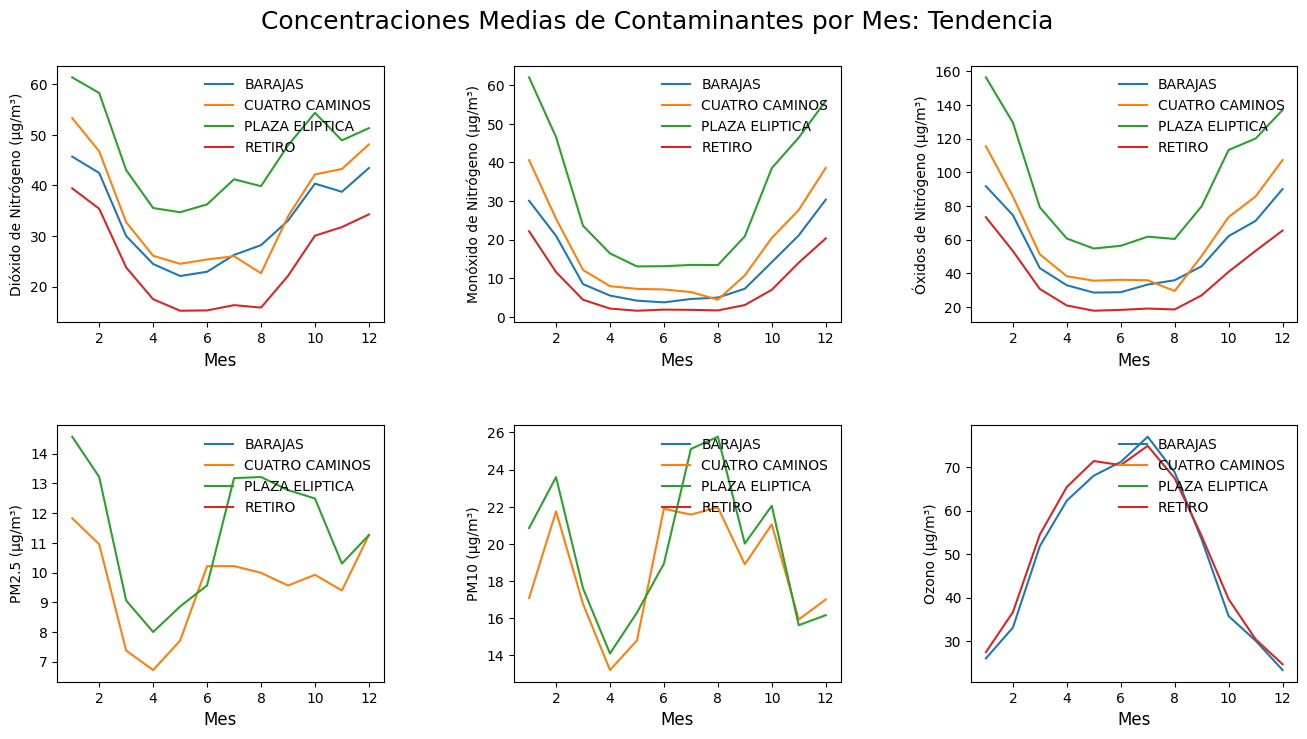

In [114]:
fig = plt.figure(1 , figsize = (16 , 8))
n = 0
columns_c = ['dioxido_nitrogeno', 'monoxido_nitrogeno', 'oxido_nitrogeno', 'pm25', 'pm10', 'ozono']

cmap = plt.cm.get_cmap('tab10',9)

for c in columns_c:
    n += 1
    plt.subplot(2, 3, n)
    plt.subplots_adjust(hspace = 0.4 , wspace = 0.4)
    ax = sns.lineplot(data.groupby(['estacion','mes']).mean(numeric_only=True), x='mes', y=c, color=cmap(n-1), hue='estacion')
    sns.move_legend(ax, 'upper right', title=None, frameon=False)

fig.axes[0].set_xlabel('Mes', fontsize=12)
fig.axes[0].set_ylabel('Dióxido de Nitrógeno (µg/m³)')
fig.axes[1].set_xlabel('Mes', fontsize=12)
fig.axes[1].set_ylabel('Monóxido de Nitrógeno (µg/m³)')
fig.axes[2].set_xlabel('Mes', fontsize=12)
fig.axes[2].set_ylabel('Óxidos de Nitrógeno (µg/m³)')
fig.axes[3].set_xlabel('Mes', fontsize=12)
fig.axes[3].set_ylabel('PM2.5 (µg/m³)')
fig.axes[4].set_xlabel('Mes', fontsize=12)
fig.axes[4].set_ylabel('PM10 (µg/m³)')
fig.axes[5].set_xlabel('Mes', fontsize=12)
fig.axes[5].set_ylabel('Ozono (µg/m³)')


fig.suptitle('Concentraciones Medias de Contaminantes por Mes: Tendencia', fontsize=18, y=0.95)
plt.show()

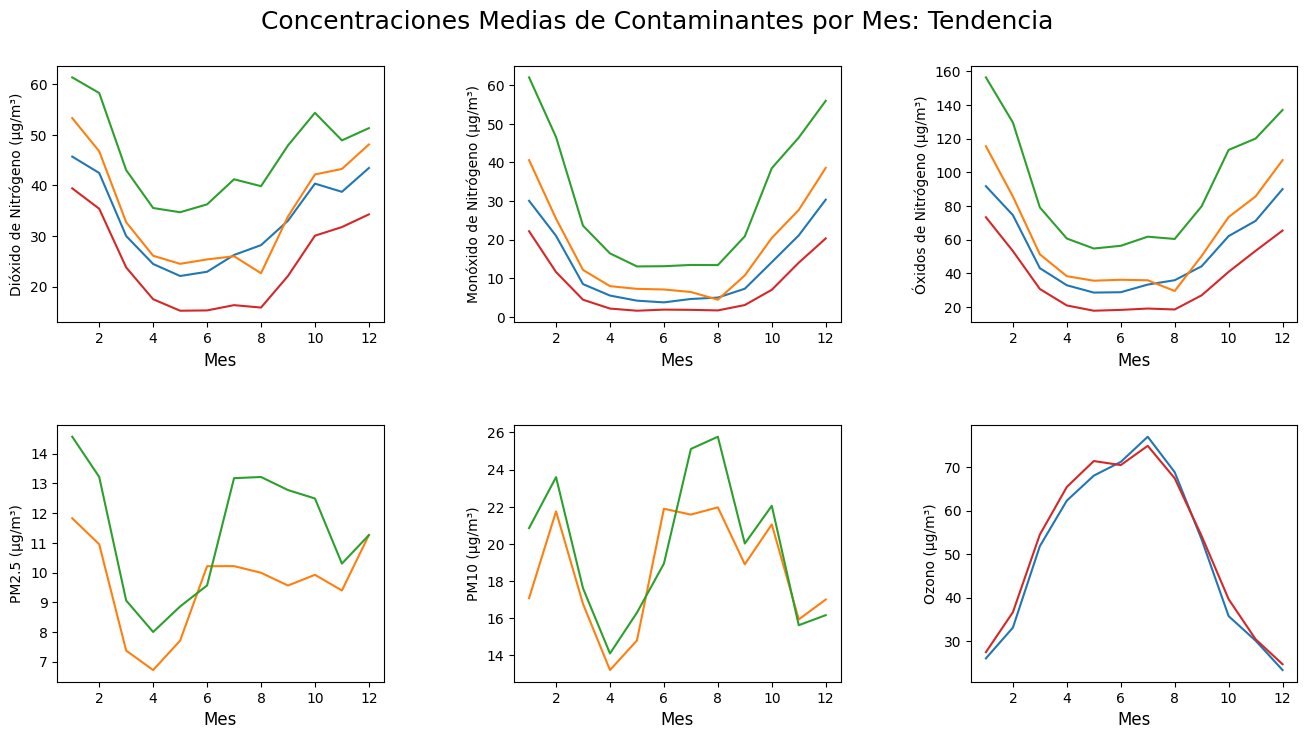

In [115]:
# sin leyenda
fig = plt.figure(1 , figsize = (16 , 8))
n = 0
columns_c = ['dioxido_nitrogeno', 'monoxido_nitrogeno', 'oxido_nitrogeno', 'pm25', 'pm10', 'ozono']

cmap = plt.cm.get_cmap('tab10',9)

for c in columns_c:
    n += 1
    plt.subplot(2, 3, n)
    plt.subplots_adjust(hspace = 0.4 , wspace = 0.4)
    sns.lineplot(data.groupby(['estacion','mes']).mean(numeric_only=True), x='mes', y=c, color=cmap(n-1), hue='estacion', legend=False)

fig.axes[0].set_xlabel('Mes', fontsize=12)
fig.axes[0].set_ylabel('Dióxido de Nitrógeno (µg/m³)')
fig.axes[1].set_xlabel('Mes', fontsize=12)
fig.axes[1].set_ylabel('Monóxido de Nitrógeno (µg/m³)')
fig.axes[2].set_xlabel('Mes', fontsize=12)
fig.axes[2].set_ylabel('Óxidos de Nitrógeno (µg/m³)')
fig.axes[3].set_xlabel('Mes', fontsize=12)
fig.axes[3].set_ylabel('PM2.5 (µg/m³)')
fig.axes[4].set_xlabel('Mes', fontsize=12)
fig.axes[4].set_ylabel('PM10 (µg/m³)')
fig.axes[5].set_xlabel('Mes', fontsize=12)
fig.axes[5].set_ylabel('Ozono (µg/m³)')


fig.suptitle('Concentraciones Medias de Contaminantes por Mes: Tendencia', fontsize=18, y=0.95)
plt.show()

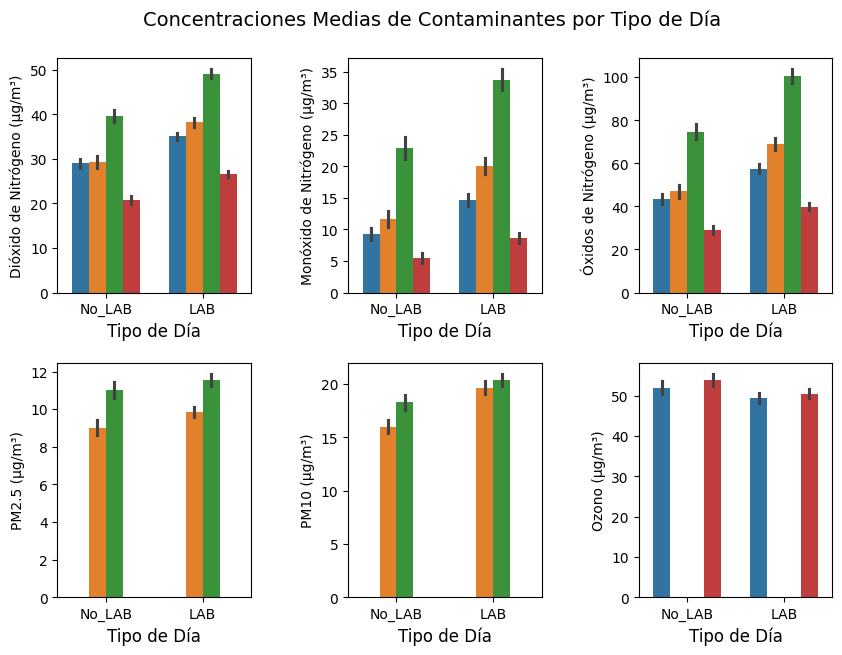

In [128]:
# tomar leyenda de figura anterior de barras

fig = plt.figure(1 , figsize = (10 , 7))
n = 0
columns_c = ['dioxido_nitrogeno', 'monoxido_nitrogeno', 'oxido_nitrogeno',
             'pm25', 'pm10', 'ozono']
cmap = plt.cm.get_cmap('tab10',9)

for c in columns_c:
    n += 1
    plt.subplot(2, 3, n)
    plt.subplots_adjust(hspace = 0.3 , wspace = 0.5)
    sns.barplot(data, x='dia_tipo', y=c, palette='tab10', width=0.7, hue='estacion', legend=False) # calcula la media

fig.axes[0].set_xlabel('Tipo de Día', fontsize=12)
fig.axes[0].set_ylabel('Dióxido de Nitrógeno (µg/m³)')
fig.axes[1].set_xlabel('Tipo de Día', fontsize=12)
fig.axes[1].set_ylabel('Monóxido de Nitrógeno (µg/m³)')
fig.axes[2].set_xlabel('Tipo de Día', fontsize=12)
fig.axes[2].set_ylabel('Óxidos de Nitrógeno (µg/m³)')
fig.axes[3].set_xlabel('Tipo de Día', fontsize=12)
fig.axes[3].set_ylabel('PM2.5 (µg/m³)')
fig.axes[4].set_xlabel('Tipo de Día', fontsize=12)
fig.axes[4].set_ylabel('PM10 (µg/m³)')
fig.axes[5].set_xlabel('Tipo de Día', fontsize=12)
fig.axes[5].set_ylabel('Ozono (µg/m³)')

fig.suptitle('Concentraciones Medias de Contaminantes por Tipo de Día', fontsize=14, y=0.95)
plt.show()

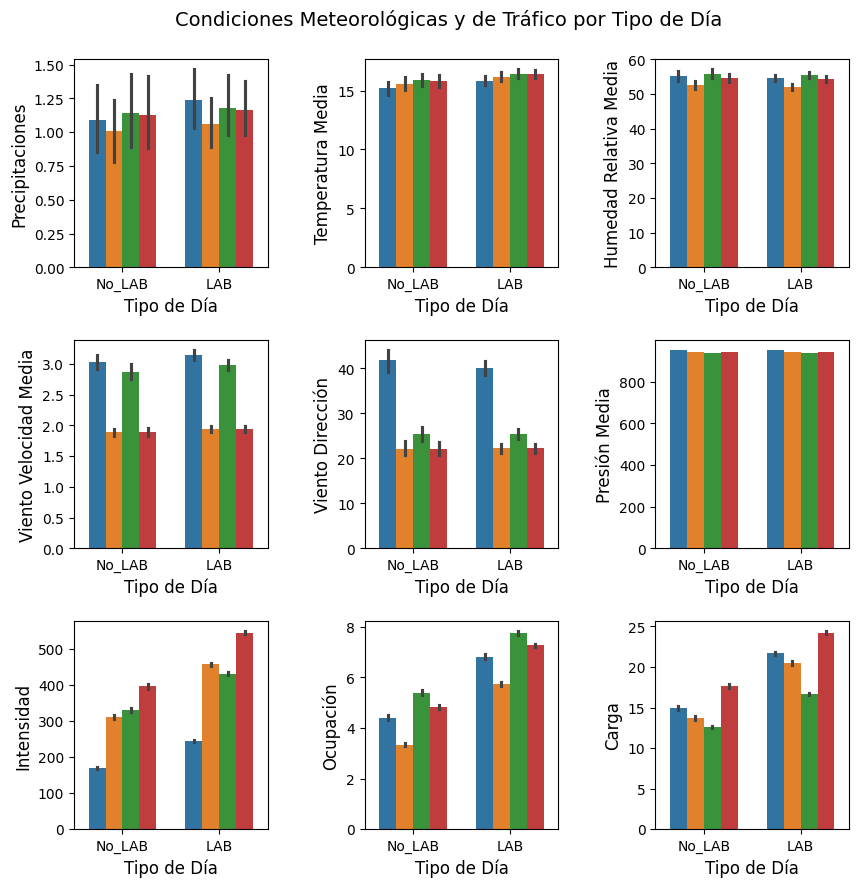

In [137]:
# tomar leyenda de figura anterior de barras
fig = plt.figure(1 , figsize = (10 , 10))
n = 0
columns_m = ['prec', 'tmed', 'hrmed', 'velmed',
             'dir', 'presmed', 'intensidad', 'ocupacion', 'carga']

for c in columns_m:
    n += 1
    plt.subplot(3, 3, n)
    plt.subplots_adjust(hspace = 0.35 , wspace = 0.5)
    sns.barplot(data, x='dia_tipo', y=c, palette='tab10', width=0.7, hue='estacion', legend=False) # calcula la media

fig.axes[0].set_xlabel('Tipo de Día', fontsize=12)
fig.axes[0].set_ylabel('Precipitaciones', fontsize=12)
fig.axes[1].set_xlabel('Tipo de Día', fontsize=12)
fig.axes[1].set_ylabel('Temperatura Media', fontsize=12)
fig.axes[2].set_xlabel('Tipo de Día', fontsize=12)
fig.axes[2].set_ylabel('Humedad Relativa Media', fontsize=12)
fig.axes[3].set_xlabel('Tipo de Día', fontsize=12)
fig.axes[3].set_ylabel('Viento Velocidad Media', fontsize=12)
fig.axes[4].set_xlabel('Tipo de Día', fontsize=12)
fig.axes[4].set_ylabel('Viento Dirección', fontsize=12)
fig.axes[5].set_xlabel('Tipo de Día', fontsize=12)
fig.axes[5].set_ylabel('Presión Media', fontsize=12)
fig.axes[6].set_xlabel('Tipo de Día', fontsize=12)
fig.axes[6].set_ylabel('Intensidad', fontsize=12)
fig.axes[7].set_xlabel('Tipo de Día', fontsize=12)
fig.axes[7].set_ylabel('Ocupación', fontsize=12)
fig.axes[8].set_xlabel('Tipo de Día', fontsize=12)
fig.axes[8].set_ylabel('Carga', fontsize=12)

fig.suptitle('Condiciones Meteorológicas y de Tráfico por Tipo de Día', fontsize=14, y=0.93)
plt.show()

<Axes: xlabel='año,dia_tipo'>

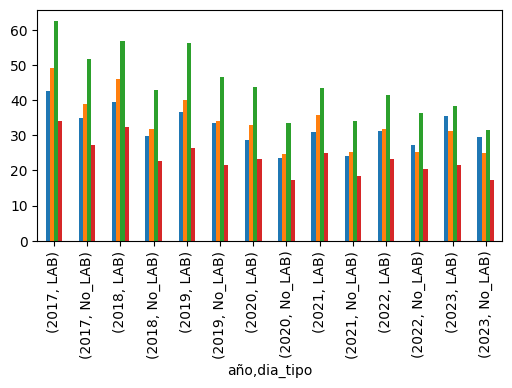

In [174]:
pd.pivot_table(data, index=['año', 'dia_tipo'], columns= 'estacion',
               values='dioxido_nitrogeno', aggfunc='mean').plot(kind='bar', legend=False, figsize = (6 , 3))

# demasiado complejo visualmente y se puede inferir de lo anterior

<Axes: xlabel='año,dia_tipo'>

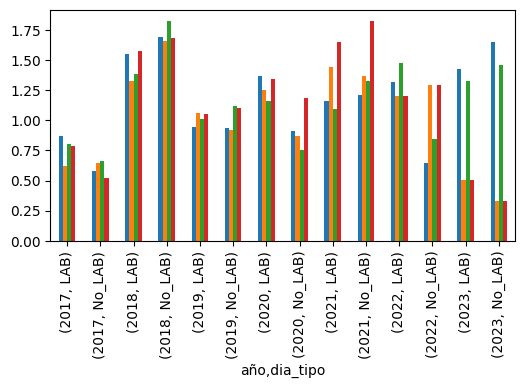

In [176]:
pd.pivot_table(data, index=['año', 'dia_tipo'], columns= 'estacion',
               values='prec', aggfunc='mean').plot(kind='bar', legend=False, figsize = (6 , 3))

# demasiado complejo visualmente y se puede inferir de lo anterior

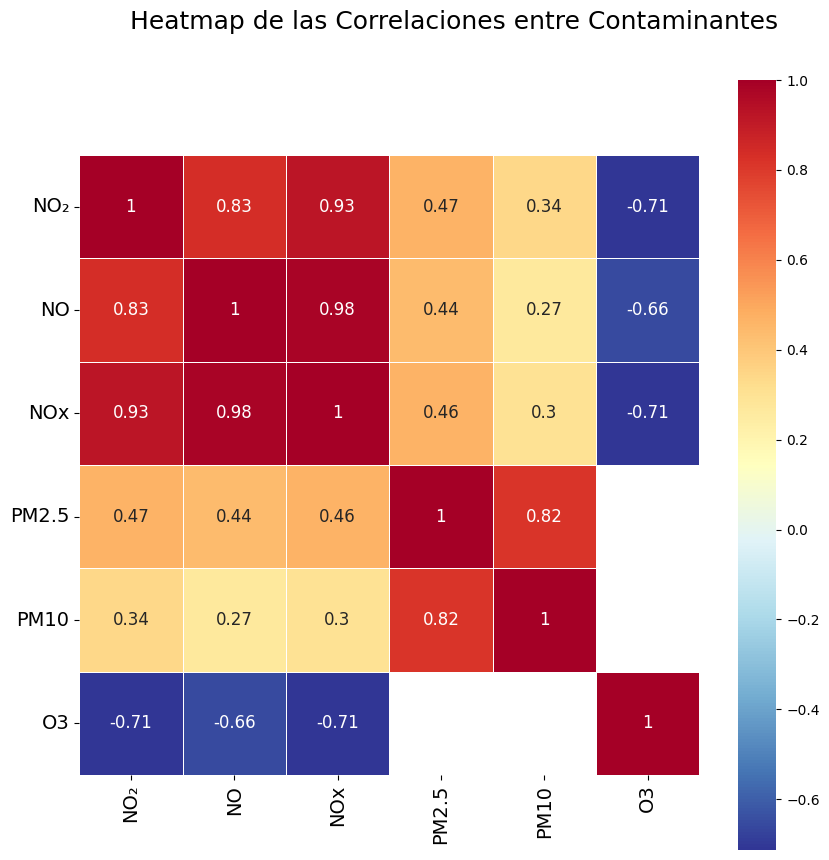

In [179]:
heatmap_c = dataset[['dioxido_nitrogeno', 'monoxido_nitrogeno', 'oxido_nitrogeno',
                     'pm25', 'pm10', 'ozono']]

fig = plt.figure(1 , figsize = (10 , 10))
sns.heatmap(heatmap_c.corr(), annot=True, cmap='RdYlBu_r', linewidths=0.5, annot_kws={'size':12}, square=True)

fig.axes[0].set_xticklabels(['NO₂','NO','NOx','PM2.5','PM10','O3'], fontsize=14)
fig.axes[0].set_yticklabels(['NO₂','NO','NOx','PM2.5','PM10','O3'], fontsize=14)


fig.suptitle('Heatmap de las Correlaciones entre Contaminantes', fontsize=18, y=0.95)
plt.show()
# por estaciones hecho anteriormente

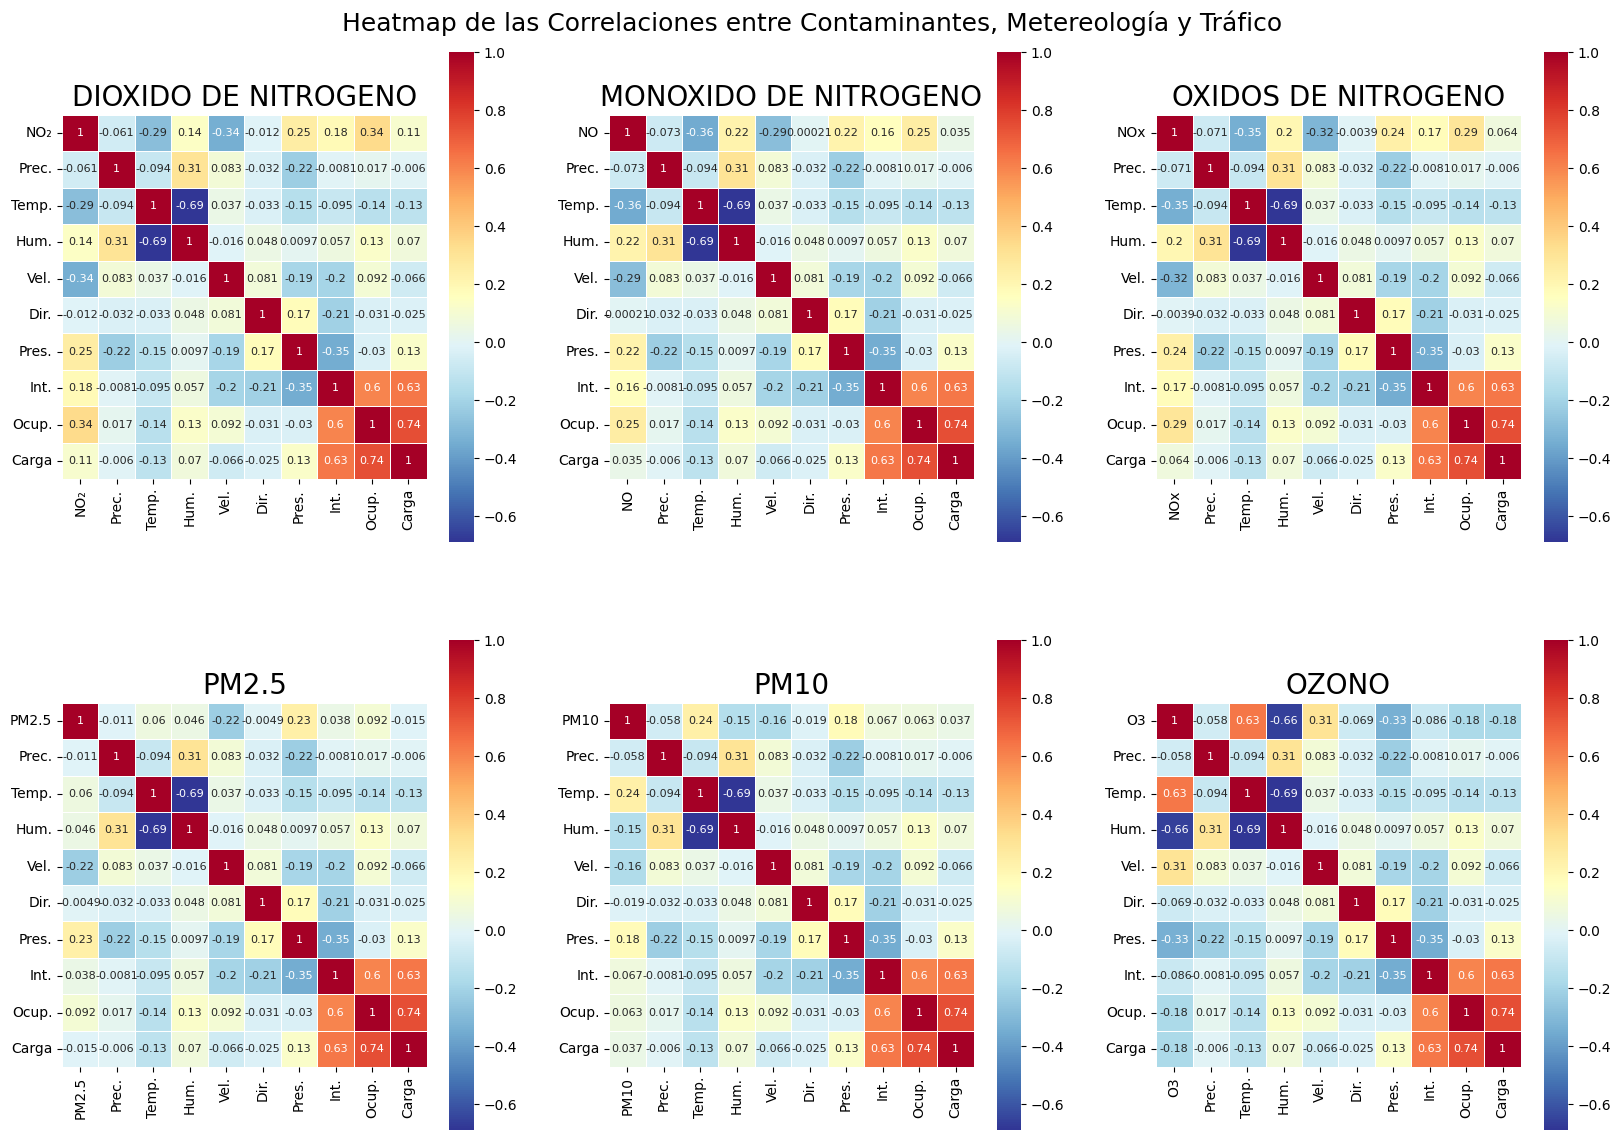

In [182]:
heatmap_dn = dataset[['dioxido_nitrogeno', 'prec', 'tmed', 'hrmed', 'velmed',
                      'dir', 'presmed', 'intensidad', 'ocupacion', 'carga']]

heatmap_mn = dataset[['monoxido_nitrogeno', 'prec', 'tmed', 'hrmed', 'velmed',
                      'dir', 'presmed', 'intensidad', 'ocupacion', 'carga']]

heatmap_on = dataset[['oxido_nitrogeno', 'prec', 'tmed', 'hrmed', 'velmed',
                      'dir', 'presmed', 'intensidad', 'ocupacion', 'carga']]

heatmap_p25 = dataset[['pm25', 'prec', 'tmed', 'hrmed', 'velmed',
                      'dir', 'presmed', 'intensidad', 'ocupacion', 'carga']]

heatmap_p10 = dataset[['pm10', 'prec', 'tmed', 'hrmed', 'velmed',
                      'dir', 'presmed', 'intensidad', 'ocupacion', 'carga']]

heatmap_oz = dataset[['ozono', 'prec', 'tmed', 'hrmed', 'velmed',
                      'dir', 'presmed', 'intensidad', 'ocupacion', 'carga']]


fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20,14))

sns.heatmap(heatmap_dn.corr(), annot=True, ax=axes[0,0], cmap='RdYlBu_r', linewidths=0.5, annot_kws={'size':8}, square=True)
sns.heatmap(heatmap_mn.corr(), annot=True, ax=axes[0,1], cmap='RdYlBu_r', linewidths=0.5, annot_kws={'size':8}, square=True)
sns.heatmap(heatmap_on.corr(), annot=True, ax=axes[0,2], cmap='RdYlBu_r', linewidths=0.5, annot_kws={'size':8}, square=True)
sns.heatmap(heatmap_p25.corr(), annot=True, ax=axes[1,0], cmap='RdYlBu_r', linewidths=0.5, annot_kws={'size':8}, square=True)
sns.heatmap(heatmap_p10.corr(), annot=True, ax=axes[1,1], cmap='RdYlBu_r', linewidths=0.5, annot_kws={'size':8}, square=True)
sns.heatmap(heatmap_oz.corr(), annot=True, ax=axes[1,2], cmap='RdYlBu_r', linewidths=0.5, annot_kws={'size':8}, square=True)


axes[0,0].set_xticklabels(['NO₂','Prec.','Temp.','Hum.', 'Vel.', 'Dir.', 'Pres.', 'Int.', 'Ocup.', 'Carga'])
axes[0,0].set_yticklabels(['NO₂','Prec.','Temp.','Hum.', 'Vel.', 'Dir.', 'Pres.', 'Int.', 'Ocup.', 'Carga'])
axes[0,1].set_xticklabels(['NO','Prec.','Temp.','Hum.', 'Vel.', 'Dir.', 'Pres.', 'Int.', 'Ocup.', 'Carga'])
axes[0,1].set_yticklabels(['NO','Prec.','Temp.','Hum.', 'Vel.', 'Dir.', 'Pres.', 'Int.', 'Ocup.', 'Carga'])
axes[0,2].set_xticklabels(['NOx','Prec.','Temp.','Hum.', 'Vel.', 'Dir.', 'Pres.', 'Int.', 'Ocup.', 'Carga'])
axes[0,2].set_yticklabels(['NOx','Prec.','Temp.','Hum.', 'Vel.', 'Dir.', 'Pres.', 'Int.', 'Ocup.', 'Carga'])

axes[1,0].set_xticklabels(['PM2.5','Prec.','Temp.','Hum.', 'Vel.', 'Dir.', 'Pres.', 'Int.', 'Ocup.', 'Carga'])
axes[1,0].set_yticklabels(['PM2.5','Prec.','Temp.','Hum.', 'Vel.', 'Dir.', 'Pres.', 'Int.', 'Ocup.', 'Carga'])
axes[1,1].set_xticklabels(['PM10','Prec.','Temp.','Hum.', 'Vel.', 'Dir.', 'Pres.', 'Int.', 'Ocup.', 'Carga'])
axes[1,1].set_yticklabels(['PM10','Prec.','Temp.','Hum.', 'Vel.', 'Dir.', 'Pres.', 'Int.', 'Ocup.', 'Carga'])
axes[1,2].set_xticklabels(['O3','Prec.','Temp.','Hum.', 'Vel.', 'Dir.', 'Pres.', 'Int.', 'Ocup.', 'Carga'])
axes[1,2].set_yticklabels(['O3','Prec.','Temp.','Hum.', 'Vel.', 'Dir.', 'Pres.', 'Int.', 'Ocup.', 'Carga'])

axes[0,0].set_title('DIOXIDO DE NITROGENO', fontsize=20)
axes[0,1].set_title('MONOXIDO DE NITROGENO', fontsize=20)
axes[0,2].set_title('OXIDOS DE NITROGENO', fontsize=20)
axes[1,0].set_title('PM2.5', fontsize=20)
axes[1,1].set_title('PM10', fontsize=20)
axes[1,2].set_title('OZONO', fontsize=20)

fig.suptitle('Heatmap de las Correlaciones entre Contaminantes, Metereología y Tráfico', fontsize=18, y=0.91)
plt.show()